In [1]:
pip install pytesseract


  Created wheel for pytesseract: filename=pytesseract-0.3.0-py2.py3-none-any.whl size=20970 sha256=c6ff8ac0874b3e6a8653f068fe34c8f3de76a779be6b4b1429d94e8f2ed3d651
  Stored in directory: /root/.cache/pip/wheels/78/c9/ac/4cb76bd547f9970070522439e5203ba7926c5c5c4f131583ea
Successfully built pytesseract


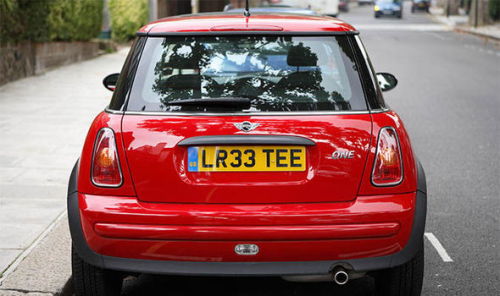

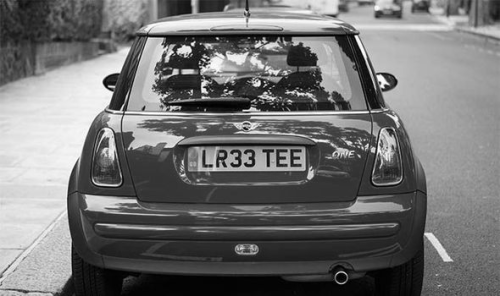

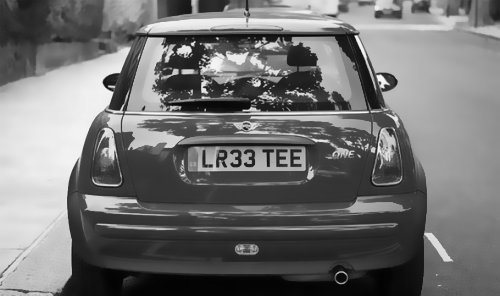

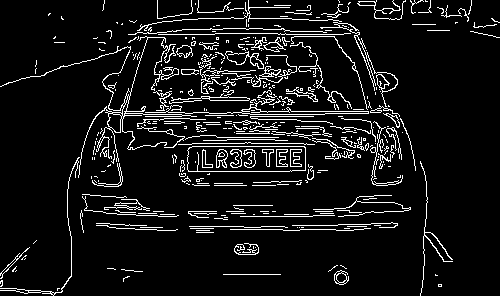

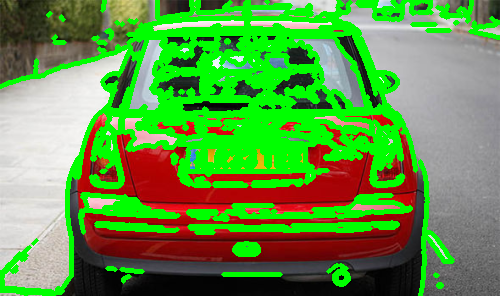

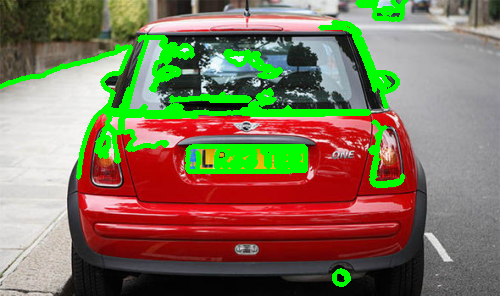

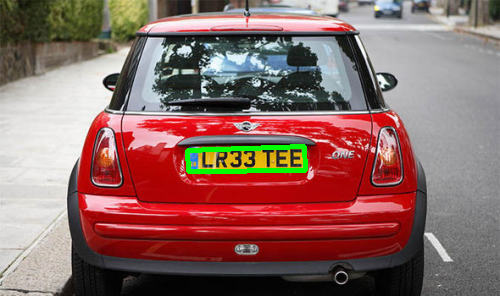

In [5]:
import pytesseract
import cv2 
import imutils
import pytesseract
image=cv2.imread('np.jpg')  #read image
image=imutils.resize(image,width=500)  #resize
from google.colab.patches import cv2_imshow
cv2_imshow(image)  #display original image
gray=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)
gray=cv2.bilateralFilter(gray, 11, 17, 17) #noise removal while percieving edge
cv2_imshow(gray)
#find edges of grayscale
edge=cv2.Canny(gray,170,200)
cv2_imshow(edge)
#contours - continuous shapes in image
img,cnts, new = cv2.findContours(edge,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
img1=image.copy()
cv2.drawContours(img1, cnts, -1,(0,255,0),3)
cv2_imshow(img1)
#sort contours based on their area min area=30
cnts=sorted(cnts,key=cv2.contourArea, reverse=True)[:30]
NumberPlateCnt=None
# Top 30 cnts
img2=image.copy()
cv2.drawContours(img2,cnts,-1,(0,255,0),3)
cv2_imshow(img2)
#best possible approximate contours for number plate
count=0
i=7
for c in cnts:
  peri=cv2.arcLength(c,True)
  approx=cv2.approxPolyDP(c,0.02*peri,True)  #number of edges
  if len(approx)==4:           #number palte has 4 corners
    NumberPlateCnt=approx

    #crop the contours
    x,y,w,h=cv2.boundingRect(c)  #find rect for plate
    new_img=image[y:y+h,x:x+w] #create new image
    cv2.imwrite('/'+str(i) + '.jpg',new_img)#store new image
    i+=1

    break
  
#draw selected contour on car
cv2.drawContours(image,[NumberPlateCnt],-1,(0,255,0),3)
cv2_imshow(image)
Cropped_img_loc='/7.jpg'
cv2_imshow(cv2.imread(Cropped_img_loc))

In [6]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 35 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 4s (1,300 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [0]:
#extractedInformation = pytesseract.image_to_string(cv2.imread())
#print(extractedInformation)

In [10]:
text=pytesseract.image_to_string(Cropped_img_loc,lang='eng')
print('Number is : ',text)

Number is :  


In [15]:
g=cv2.imread(Cropped_img_loc)
g=cv2.cvtColor(g, cv2.COLOR_BGR2GRAY)
cv2_imshow(g)
text=pytesseract.image_to_string(g,lang='eng')
print('Number is : ',text)

Number is :  
